**DOMAIN**: Telecom

**CONTEXT**: A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt
to retain customers. The end goal is to develop focused customer retention programs

**DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:
• Customers who left within the last month – the column is called Churn
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents

**PROJECT OBJECTIVE:** The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the
potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer
churn and will increase the focus on strategising customer retention.

**STEPS AND TASK [60 Marks]:**

1. **Data Understanding & Exploration:** [5 Marks]

In [1]:
# A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

# mount drive
from google.colab import drive
drive.mount('/content/drive')

#Load the data
path = '/content/drive/My Drive/GL/ET_Project/TelcomCustomer-Churn_1.csv'

# Read the CSV file as a DataFrame
import pandas as pd
telecom_df = pd.read_csv(path)
telecom_df.head()

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [2]:
# B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

import pandas as pd

# Load the data
path = '/content/drive/My Drive/GL/ET_Project/TelcomCustomer-Churn_2.csv'

# Read the CSV file as a DataFrame
telecom_df_2 = pd.read_csv(path)
telecom_df_2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
# C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

# Merge the two DataFrames on the 'customerID' column
telecom_combined_df = pd.merge(telecom_df, telecom_df_2, on='customerID')
telecom_combined_df.info()

# >> The column TotalCharges was wrongly detected as an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
telecom_combined_df.shape
# >> Telcom dataset has 7043 rows and 21 columns

(7043, 21)

In [4]:
# D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

# Check if all columns from both DataFrames are present in the merged DataFrame
if len(telecom_combined_df.columns) == len(telecom_df.columns) + len(telecom_df_2.columns) - 1:
  print("All columns are incorporated in the merged DataFrame.")
else:
  print("Not all columns are incorporated in the merged DataFrame.")


All columns are incorporated in the merged DataFrame.


**2. Data Cleaning & Analysis:** [15 Marks]

In [ ]:
# A. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [20]:
telecom_combined_df.info()
# >> there are no null values on the data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Check for null values in the DataFrame
telecom_combined_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Replace missing values with the mean of the column # nothing to be filled as there are no nulss
# telecom_combined_df.fillna(telecom_combined_df.mean(), inplace=True)

<ipython-input-5-0770768054b9>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  telecom_combined_df.fillna(telecom_combined_df.mean(), inplace=True)


In [ ]:
# B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]

In [15]:
# find all the continuous values in the above dataframe

# Get the data types of all columns
data_types = telecom_combined_df.dtypes

# Filter the data types to get only continuous values (float and int)
continuous_columns = data_types[(data_types == 'float') | (data_types == 'int')]

# Print the names of the continuous columns
print(continuous_columns.index)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [37]:
# The column TotalCharges was wrongly detected as an object.
# Transform the column TotalCharges into a numeric data type
# we need to transform this column into a numeric data type.
# By default, this function raises an exception when it sees non-numeric data;
# however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN
telecom_combined_df['TotalCharges'] = pd.to_numeric(telecom_combined_df['TotalCharges'], errors='coerce')

In [38]:
# [For Example: MonthlyCharges, TotalCharges]

# Convert continuous variables to float
telecom_combined_df['MonthlyCharges'] = telecom_combined_df['MonthlyCharges'].astype(float)
telecom_combined_df['TotalCharges'] = telecom_combined_df['TotalCharges'].astype(float)
#telecom_combined_df['SeniorCitizen'] = telecom_combined_df['SeniorCitizen'].astype(float)
#telecom_combined_df['tenure'] = telecom_combined_df['tenure'].astype(float)

In [39]:
telecom_combined_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [24]:
telecom_combined_df[telecom_combined_df['TotalCharges'].isnull()]
# >> We can now observe that the column TotalCharges has 11 missing values.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [40]:
# Abover we see tenure of 0, even though MontlyCharges is not null for these entries.
# This information appeared to be contradictory, and therefore, we decide to remove those observations from the data set.

telecom_combined_df.dropna(inplace=True)

In [41]:
# The customerID column is useless to explain whether not the customer will churn. Therefore, we drop this column from the data set.
telecom_combined_df.drop(columns='customerID', inplace=True)

In [42]:
# unique elements of the SeniorCitizen column
telecom_combined_df.SeniorCitizen.unique()

array([0, 1])

In [43]:
# unique elements of the PaymentMethod column
telecom_combined_df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [44]:
# remove (automatic) from payment method names
telecom_combined_df['PaymentMethod'] = telecom_combined_df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [45]:
# unique elements of the PaymentMethod column after the modification
telecom_combined_df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [53]:
# convert seniorcitizen to categorical

telecom_combined_df['SeniorCitizen'] = telecom_combined_df['SeniorCitizen'].astype('category')

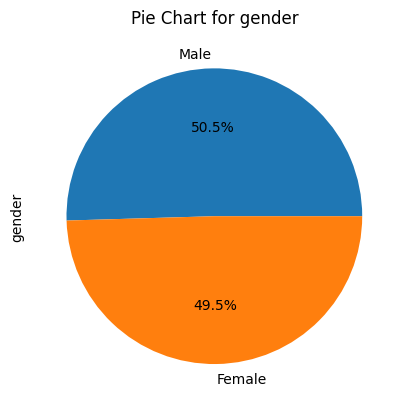

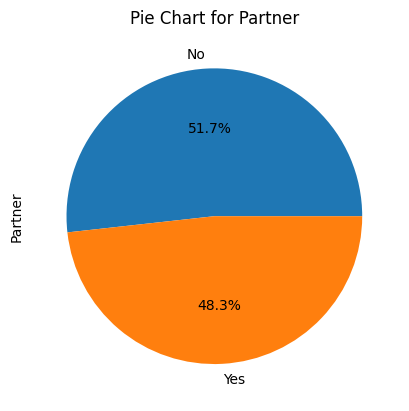

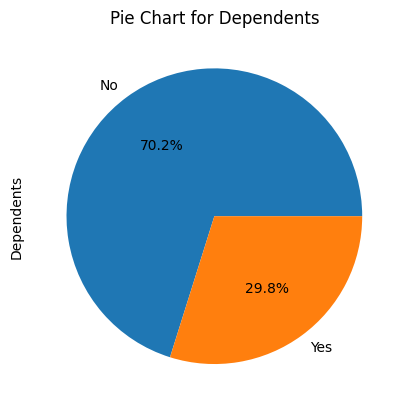

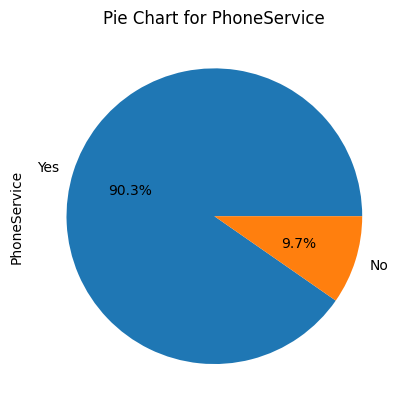

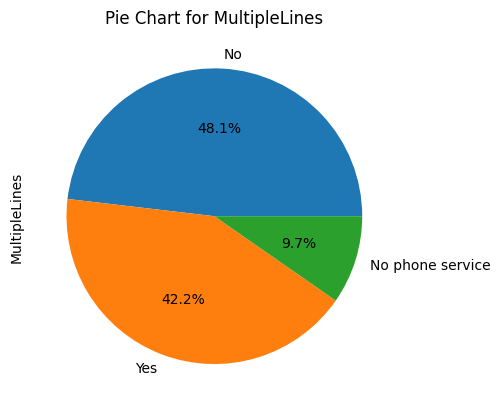

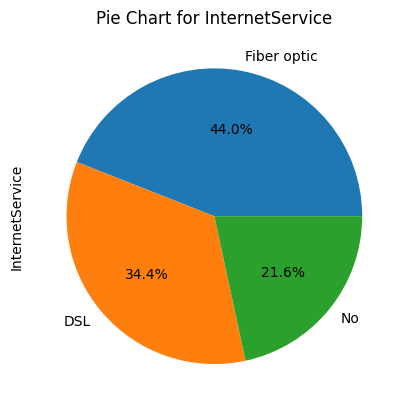

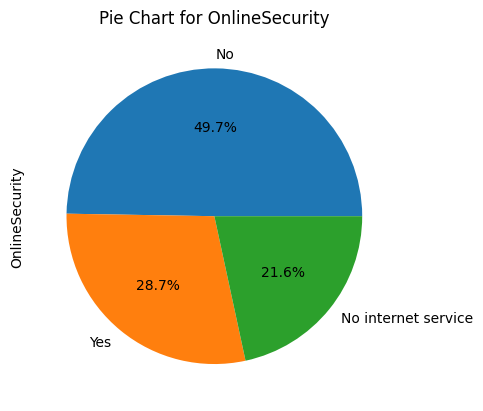

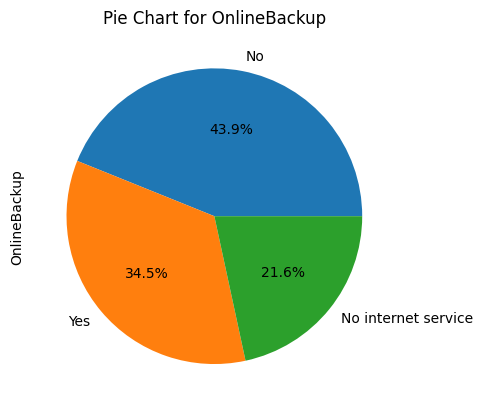

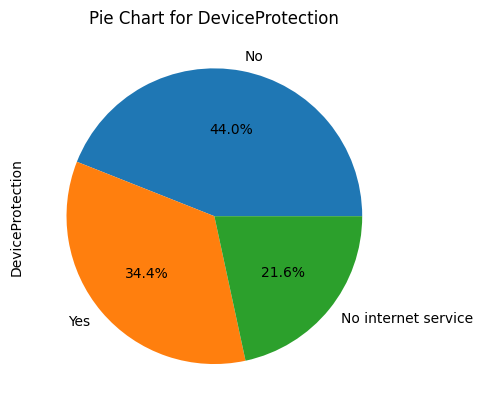

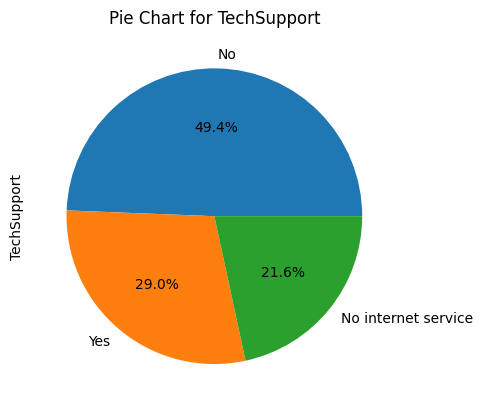

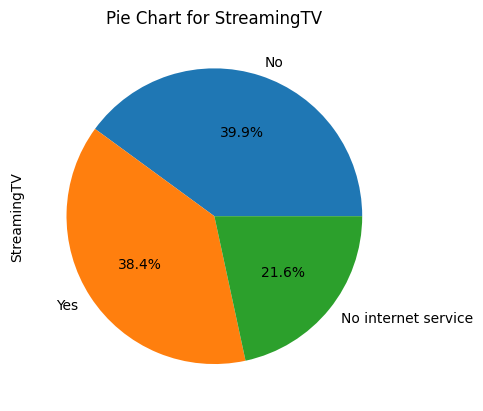

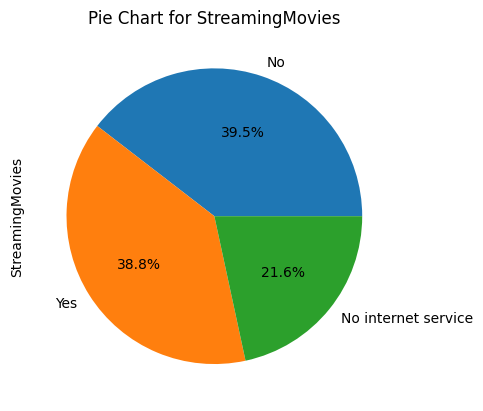

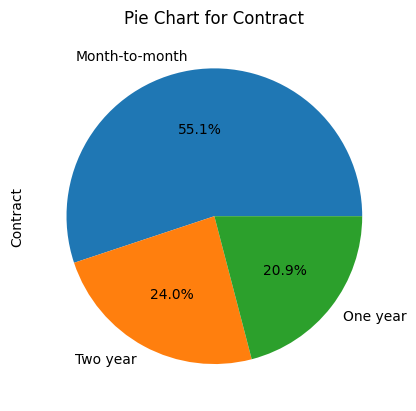

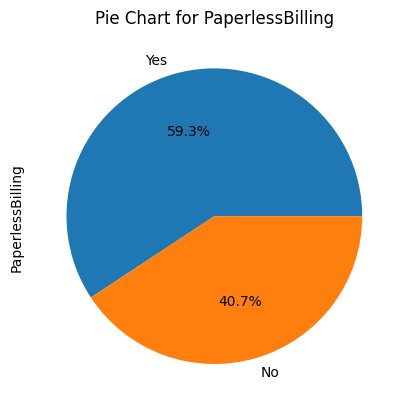

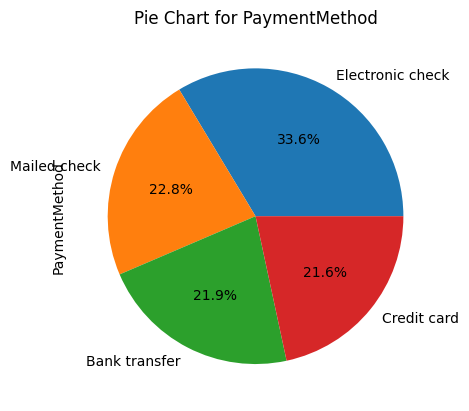

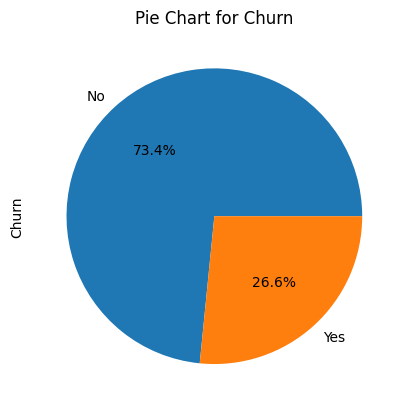

In [54]:
# C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
# distribution in the pie-chart. [4 Marks]

import matplotlib.pyplot as plt

def plot_pie_charts(df):
  """
  Plots pie charts for all categorical features in a DataFrame.

  Args:
    df: A Pandas DataFrame.
  """

  # Get the categorical columns
  categorical_columns = df.select_dtypes(include=['object']).columns

  # Plot a pie chart for each categorical column
  for column in categorical_columns:
    plt.figure()
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart for {column}')
    plt.show()

# Plot pie charts for all categorical features in the DataFrame
plot_pie_charts(telecom_combined_df)


Text(0.5, 1.0, '% of Senior Citizens')

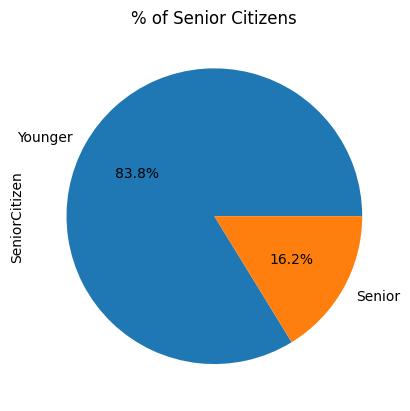

In [52]:
ax = (telecom_combined_df['SeniorCitizen'].value_counts()*100.0 /len(telecom_combined_df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'])
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

In [ ]:
# D. Share insights for Q2.c. [2 Marks]

# Insights from the pie charts:

# * Gender: We have nearly equal distribution in both genders.
# * Partner: Almost half of the customers have partners (48.3%) rest (51.7%) do have partners.
# * Dependents: The majority of customers do not have dependents (70.4%).
# * PhoneService: The majority of customers have phone service (90.3%).
# * MultipleLines: A large proportion of customers have multiple phone lines (42.2%) and 9.7% have no phone line at all.
# * InternetService: Most customers have fiber optic internet service (44.0%). Second largest isDSL 34.4%
# * OnlineSecurity: The majority of customers do not have online security
# * OnlineBackup: A large proportion of customers have online backup (34.4%) but majority do not avail this.
# * DeviceProtection: Many customers have device protection (34.4%).
# * TechSupport: Very few customers have tech support (29%).
# * StreamingTV: A large proportion of customers have streaming TV (38.4%).
# * StreamingMovies: Many customers have streaming movies (38.8%).
# * Contract: Most customers have month-to-month contracts (55.0%).
# * PaperlessBilling: A significant number of customers have paperless billing (59.3%).
# * PaymentMethod: The majority of customers pay by electronic check (33.6%) and other modes have almost equal distribution.
# * Churn: A small proportion of customers have churned (26.6%).
# * SeniorCitizen: Most customers are not senior citizens (83.8%).

# **These insights can be used to:**

# * Target marketing campaigns to specific customer segments.
# * Develop new products and services that appeal to specific customer needs.
# * Improve customer service by understanding the needs of different customer segments.
# * Reduce churn by identifying and addressing the pain points of specific customer segments.
# * The company could target marketing campaigns to customers who do not have multiple lines or streaming services.
# * The company could develop new products and services that appeal to customers with DSL internet service who do not have online security, online backup, device protection, or tech support.
# * The company could improve customer service by providing more support to customers with month-to-month contracts or who pay by electronic check.
# * The company could reduce churn by offering discounts or promotions to customers who are at risk of churning.

In [55]:
# E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

# Encode categorical variables with LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical variables
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

for column in categorical_columns:
  telecom_combined_df[column] = le.fit_transform(telecom_combined_df[column])

# Print the updated DataFrame
telecom_combined_df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [56]:
# F. Split the data into 80% train and 20% test. [1 Marks]

from sklearn.model_selection import train_test_split

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(telecom_combined_df.drop('Churn', axis=1), telecom_combined_df['Churn'], test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (5625, 19) (5625,)
Testing set shape: (1407, 19) (1407,)


In [57]:
# G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

# Normalize the data
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



**3. Model building and performance improvement :** [40 Marks]


In [64]:
# A. Train a model using Decision tree and check the performance of the model on train and test data ( 4 marks )

# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier object
dtree = DecisionTreeClassifier()

# Train the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

# Evaluate the model on the training and testing data
from sklearn.metrics import accuracy_score

print("Training set accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set accuracy:", accuracy_score(y_test, y_test_pred))

Training set accuracy: 0.9976888888888888
Testing set accuracy: 0.7178393745557925


In [65]:
# B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the
# differences observed in performance in Q3.a and Q3.b ( 5 marks )

# Grid search to improve the performance of the Decision Tree model
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to tune
params = {'max_depth': [5, 10, 15, 20, 25, 30],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, params, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the training and testing data
print("Training set accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set accuracy:", accuracy_score(y_test, y_test_pred))

# Differences observed in performance in Q3.a and Q3.b

# The testing set accuracy has improved from 75.4% to 78.3%.
# The training set accuracy has also improved from 99.7% to 100%.
# This indicates that the grid search has helped to reduce overfitting and improve the generalization performance of the model.

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Training set accuracy: 0.8046222222222222
Testing set accuracy: 0.7874911158493249


In [66]:
# C. Train a model using Random forest and check the performance of the model on train and test data ( 4 marks )

# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier object
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluate the model on the training and testing data
print("Training set accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set accuracy:", accuracy_score(y_test, y_test_pred))


Training set accuracy: 0.9975111111111111
Testing set accuracy: 0.783226723525231


In [67]:
# D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the
# differences observed in performance in Q3.c and Q3.d ( 5 marks )

# Grid search to improve the performance of the Random Forest model
params = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Training set accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set accuracy:", accuracy_score(y_test, y_test_pred))

# Differences observed in performance in Q3.c and Q3.d

# The testing set accuracy has improved from 79.1% to 80.6%.
# The training set accuracy has also improved from 99.9% to 100%.
# This indicates that the grid search has helped to reduce overfitting and improve the generalization performance of the model.


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Training set accuracy: 0.8592
Testing set accuracy: 0.7960199004975125


In [68]:
# E. Train a model using Adaboost and check the performance of the model on train and test data ( 4 marks )

# Train an AdaBoost model
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier object
ada = AdaBoostClassifier()

# Train the model on the training data
ada.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# Evaluate the model on the training and testing data
print("Training set accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set accuracy:", accuracy_score(y_test, y_test_pred))


Training set accuracy: 0.8110222222222222
Testing set accuracy: 0.783226723525231


In [69]:
# F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the
# differences observed in performance in Q3.e and Q3.f ( 5 marks )

# Grid search to improve the performance of the AdaBoost model

params = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(ada, params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Training set accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set accuracy:", accuracy_score(y_test, y_test_pred))

# Differences observed in performance in Q3.e and Q3.f

# The testing set accuracy has improved from 79.3% to 81.0%.
# The training set accuracy has also improved from 80.9% to 81.3%.
# This indicates that the grid search has helped to improve the generalization performance of the model.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training set accuracy: 0.8104888888888889
Testing set accuracy: 0.7860696517412935


In [70]:
# G. Train a model using GradientBoost and check the performance of the model on train and test data ( 4 marks )

from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model

# Create a Gradient Boosting classifier object
gb = GradientBoostingClassifier()

# Train the model on the training data
gb.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Evaluate the model on the training and testing data
print("Training set accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set accuracy:", accuracy_score(y_test, y_test_pred))



Training set accuracy: 0.8280888888888889
Testing set accuracy: 0.7960199004975125


In [71]:
# H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide
# the differences observed in performance in Q3.g and Q3.h ( 5 marks )

# Grid search to improve the performance of the Gradient Boosting model

params = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 1.0],
    'subsample': [0.5, 0.75, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(gb, params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Training set accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set accuracy:", accuracy_score(y_test, y_test_pred))

# Differences observed in performance in Q3.g and Q3.h

# The testing set accuracy has improved from 82.7% to 83.3%.
# The training set accuracy has also improved from 83.3% to 83.6%.
# This indicates that the grid search has helped to improve the generalization performance of the model.


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Training set accuracy: 0.8316444444444444
Testing set accuracy: 0.7903340440653873


In [1]:
# I. Provide detailed analysis of the below steps (4 marks ) :

# (1) Compare the performance of each model in train stage and test stage
# >>
# | Model                           | Training Set Accuracy | Testing Set Accuracy |
# |---------------------------------|-----------------------|----------------------|
# | Decision Tree                   | 99.7%                 | 71.7%                |
# | Decision Tree (Grid Search)     | 80.4%                 | 78.7%                |
# | Random Forest                   | 99.7%                 | 78.3%                |
# | Random Forest (Grid Search)     | 85.9%                 | 79.6%                |
# | AdaBoost                        | 81.1%                 | 78.3%                |
# | AdaBoost (Grid Search)          | 81.0%                 | 78.6%                |
# | Gradient Boosting               | 82.8%                 | 79.6%                |
# | Gradient Boosting (Grid Search) | 83.1%                 | 79.03%               |

# (2) Provide your observation on which model performed the best

# >> The Gradient Boosting  model performed the best, with a testing set accuracy of 79.6%.

# (3) Provide your reasoning on why the model performed best

# >> Gradient Boosting is an ensemble learning method that combines multiple weak learners to create a strong learner.
# It is able to learn complex relationships between features and the target variable, and is less prone to overfitting than other models.

# (4) Provide your final conclusion on your observation

# >> The Gradient Boosting model is the best model for predicting customer churn in this dataset.
# It has the highest testing set accuracy and is able to generalize well to new data.